In [777]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='8135tao', api_key='wyGWY4LmNGNohXtJ3vmo')
import plotly.plotly as py
from scipy.stats import linregress
import plotly.graph_objs as go


In [742]:
total_expo_bystate_df=pd.read_csv('DATA_Exports_of_NAICS_Total_All_Merchandise_to_World.csv')

list_of_state1 = set(total_expo_bystate_df['State'])

total_expo_bystate_df_sorted = total_expo_bystate_df.sort_values(by=['State'])
total_expo_bystate_df_sorted=total_expo_bystate_df_sorted.set_index('State')

len(list_of_state1)


55

In [743]:
total_expo_bystate_df['State']=total_expo_bystate_df['State'].str.lstrip()
total_expo_bystate_df=total_expo_bystate_df.rename(index=str, columns={"State": "state"})
total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,UNITED STATES,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11
2,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11
3,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10
4,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10


#Coloropleth map

In [744]:
cloro_df = pd.read_csv("2011_us_ag_exports.csv")
cloro_df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [745]:
cloro_df['state']=cloro_df['state'].str.lstrip()


In [746]:
list_of_state2 = set(cloro_df['state'])
#list_of_state2

In [747]:
inter_states = list_of_state1&list_of_state2
inter_states

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [748]:
total_expo_bystate_df = total_expo_bystate_df[total_expo_bystate_df['state'].isin(inter_states) ]    

total_expo_bystate_df['mean'] = total_expo_bystate_df.loc[:, '2007':'2016'].mean(axis=1)

total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
1,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11,2.289572e+11
2,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11,1.534451e+11
3,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10,7.823226e+10
4,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10,6.903547e+10
5,Illinois,4.889625e+10,5.367748e+10,4.162611e+10,5.006071e+10,6.490290e+10,6.815788e+10,6.621289e+10,6.839400e+10,6.336869e+10,5.968098e+10,6.518697e+10,5.849779e+10


In [787]:
total_expo_bystate_mean_df = total_expo_bystate_df[['state','mean']]
total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean']/(10**9)


total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['state']).reset_index(drop=True)
total_expo_bystate_mean_df['code'] = cloro_df['code']
total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['mean'],ascending=False).reset_index(drop=True)
total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean'].round(2)

total_expo_bystate_mean_df.to_csv('Total export by state.csv',index=False)
total_expo_bystate_mean_df.head()


C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,state,mean,code
0,Texas,228.96,TX
1,California,153.45,CA
2,New York,78.23,NY
3,Washington,69.04,WA
4,Illinois,58.50,IL


In [753]:


for col in total_expo_bystate_mean_df.columns:
    total_expo_bystate_mean_df[col] = total_expo_bystate_mean_df[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, 'rgb(220,110,110)'],[0.2, 'rgb(180,90,90)'],[0.4, 'rgb(150,75,75)'],\
#             [0.6, 'rgb(120,60,60)'],[0.8, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

scl = [[0.0, 'rgb(220,110,110)'],[0.25, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

total_expo_bystate_mean_df['text'] = total_expo_bystate_mean_df['state'] + '<br>' +\
    'Average Export $'+total_expo_bystate_mean_df['mean']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        #locations = df['code'],
        locations = total_expo_bystate_mean_df['code'],
        #z = df['total exports'].astype(float),
        z = total_expo_bystate_mean_df['mean'].astype(float),
        locationmode = 'USA-states',
        text = total_expo_bystate_mean_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        )
    ) ]

layout = dict(
        title = '2007-2017 Average Total Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

#url = py.plot(fig, filename='d3-cloropleth-map')



In [754]:
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~8135tao/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


#Scatter Plot

In [755]:
#total_expo_bystate_df
total_expo_bycountry_df = pd.read_csv("DATA_Exports_of_NAICS_Total_All_Merchandise.csv")
total_expo_bycountry_df = total_expo_bycountry_df.loc[(total_expo_bycountry_df.loc[:,'2007':'2016'].T !=0).any()].reset_index(drop=True)
total_expo_bycountry_df.head()
#.any() check each column, if any element in that column is true, return ture for that column

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1148198722191,1287441996730,1056042963028,1278494525839,1482507755226,1545820839892,1578516879950,1621873792910,1503328349746,1451023529686,1546272961061
1,Canada,248888144575,261149833516,204657955218,249256459292,281291530822,292650534087,300754868974,312816950458,280855169199,266734465220,282265135262
2,Mexico,135918138711,151220056463,128892137645,163664645537,198288737278,215875115867,225954367783,241007162317,236460137152,230051175309,243314438647
3,China,62936891576,69732837543,69496678611,91911080944,104121523635,110516615672,121746188637,123657203406,115873365314,115545507660,129893586716
4,Japan,61159582766,65141753124,51134184201,60471852133,65799736713,69975786856,65237414094,66891842650,62387809646,63226075952,67605076964


In [756]:
list_of_countries = set(total_expo_bycountry_df['Partner'][1:].astype(str))

len(list_of_countries)

236

In [757]:
gdp_df = pd.read_csv('gdp_csv.csv')
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [758]:
gdp_06_17_df = gdp_df[gdp_df['Year'] > 2006 ].reset_index(drop=True)

gdp_06_17_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,2007,1.637573e+12
1,Arab World,ARB,2008,2.078116e+12
2,Arab World,ARB,2009,1.795820e+12
3,Arab World,ARB,2010,2.109646e+12
4,Arab World,ARB,2011,2.501554e+12


In [759]:
list_of_countries_and_regions = set(gdp_06_17_df.loc[:,'Country Name'])

intersection_export_gdp =list_of_countries_and_regions&list_of_countries
len(intersection_export_gdp)



169

In [760]:

gdp_06_17_country_df=gdp_06_17_df[gdp_06_17_df['Country Name'].isin(intersection_export_gdp) ].reset_index(drop=True)

    
len(gdp_06_17_country_df)

1650

In [761]:
ten_year_data=pd.DataFrame(gdp_06_17_country_df.groupby(['Country Name']).count() ['Value'] == 10)
ten_year_data =ten_year_data.loc[ ten_year_data['Value'] == True]
ten_year_data.reset_index(inplace = True)

ten_year_data_country = set(ten_year_data['Country Name'])
ten_year_gdp_06_17_country_df = gdp_06_17_country_df[gdp_06_17_country_df['Country Name'].isin(ten_year_data_country) ].reset_index(drop=True)


In [765]:
gpbycountry_gdp = ten_year_gdp_06_17_country_df.groupby(['Country Name','Year'], as_index=False)
mean_gdp_by_country=gpbycountry_gdp.mean().groupby('Country Name')['Value'].mean()


mean_gdp_by_country_df = pd.DataFrame(mean_gdp_by_country)

mean_gdp_by_country_df = mean_gdp_by_country_df.reset_index(drop=False)

mean_gdp_by_country_df= mean_gdp_by_country_df.rename(index=str, columns={"Value": "mean gdp"})

mean_gdp_by_country_df.sort_values(by=['mean gdp'],ascending=False).head()
#mean_gdp_by_country_df.head()

,Country Name,mean gdp
32,China,7.784747e+12
70,Japan,5.217301e+12
52,Germany,3.582563e+12
151,United Kingdom,2.736682e+12
49,France,2.702817e+12


In [768]:
ten_year_country_expo_df = total_expo_bycountry_df [total_expo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_expo_df = ten_year_country_expo_df.reset_index(drop=True)
ten_year_country_expo_df['mean export'] = ten_year_country_expo_df.loc[:, '2007':'2016'].mean(axis=1)


ten_year_country_expo_mean_df = ten_year_country_expo_df[['Partner','mean export']]
ten_year_country_expo_mean_df.loc[:,'mean export'] = ten_year_country_expo_mean_df.loc[:,'mean export'].round(2)

ten_year_country_expo_mean_df=ten_year_country_expo_mean_df.rename(index=str, columns={"Partner": "Country Name"})
ten_year_country_expo_mean_df.sort_values(by=['mean export'],ascending=False).head()

C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country Name,mean export
0,Canada,2.699056e+11
1,Mexico,1.927332e+11
2,China,9.855379e+10
3,Japan,6.314260e+10
4,United Kingdom,5.211265e+10


In [769]:
total_impo_bycountry_df = pd.read_csv("DATA_Imports_of_NAICS_Total_All_Merchandise.csv")
total_impo_bycountry_df.head()

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1956961843348,2103640710944,1559624813477,1913856594014,2207954346316,2276267147199,2267986733622,2356356072353,2248811351481,2187600097145,2341962734469
1,China,321442866934,337772627823,296373883488,364952633595,399371232631,425619082637,440430019592,468474894856,483201655364,462542004554,505469954379
2,Mexico,210713966788,215941618934,176654372581,229985623006,262873595958,277593639546,280556040242,295729962846,296433325024,293923947660,314267299235
3,Canada,317056762618,339491425363,226248448986,277636732987,315324753291,324263012583,332503645324,349286122826,296305080863,277782254650,299319385870
4,Japan,145463342556,139262197032,95803683368,120552145178,128927889476,146431693012,138575341868,134504542819,131445490188,132030346544,136480825868


In [771]:
ten_year_country_impo_df = total_impo_bycountry_df [total_impo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_impo_df = ten_year_country_impo_df.reset_index(drop=True)
ten_year_country_impo_df['mean import'] = ten_year_country_impo_df.loc[:, '2007':'2016'].mean(axis=1)

ten_year_country_impo_mean_df = ten_year_country_impo_df[['Partner','mean import']]
ten_year_country_impo_mean_df.loc[:,'mean import'] = ten_year_country_impo_mean_df.loc[:,'mean import'].round(2)
ten_year_country_impo_mean_df=ten_year_country_impo_mean_df.rename(index=str, columns={"Partner": "Country Name"})

ten_year_country_impo_mean_df.sort_values(by=['mean import'],ascending=False).head()

C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country Name,mean import
0,China,4.000181e+11
2,Canada,3.055898e+11
1,Mexico,2.540406e+11
3,Japan,1.312997e+11
4,Germany,1.031038e+11


In [786]:
merged_df = pd.merge( pd.merge(ten_year_country_expo_mean_df,
                               ten_year_country_impo_mean_df,
                               on='Country Name'),
                      mean_gdp_by_country_df,
                      on='Country Name')
merged_df['mean balance']=merged_df['mean export']-merged_df['mean import']

merged_df.to_csv('mean_impo_expo_gdp_country.csv',index=False)
merged_df.head()

,Country Name,mean export,mean import,mean gdp,mean balance
0,Canada,2.699056e+11,3.055898e+11,1.632974e+12,-3.568423e+10
1,Mexico,1.927332e+11,2.540406e+11,1.120824e+12,-6.130744e+10
2,China,9.855379e+10,4.000181e+11,7.784747e+12,-3.014643e+11
3,Japan,6.314260e+10,1.312997e+11,5.217301e+12,-6.815706e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09


R^2 value is 0.6436092145143223
p value is 1.4946693224086567e-36


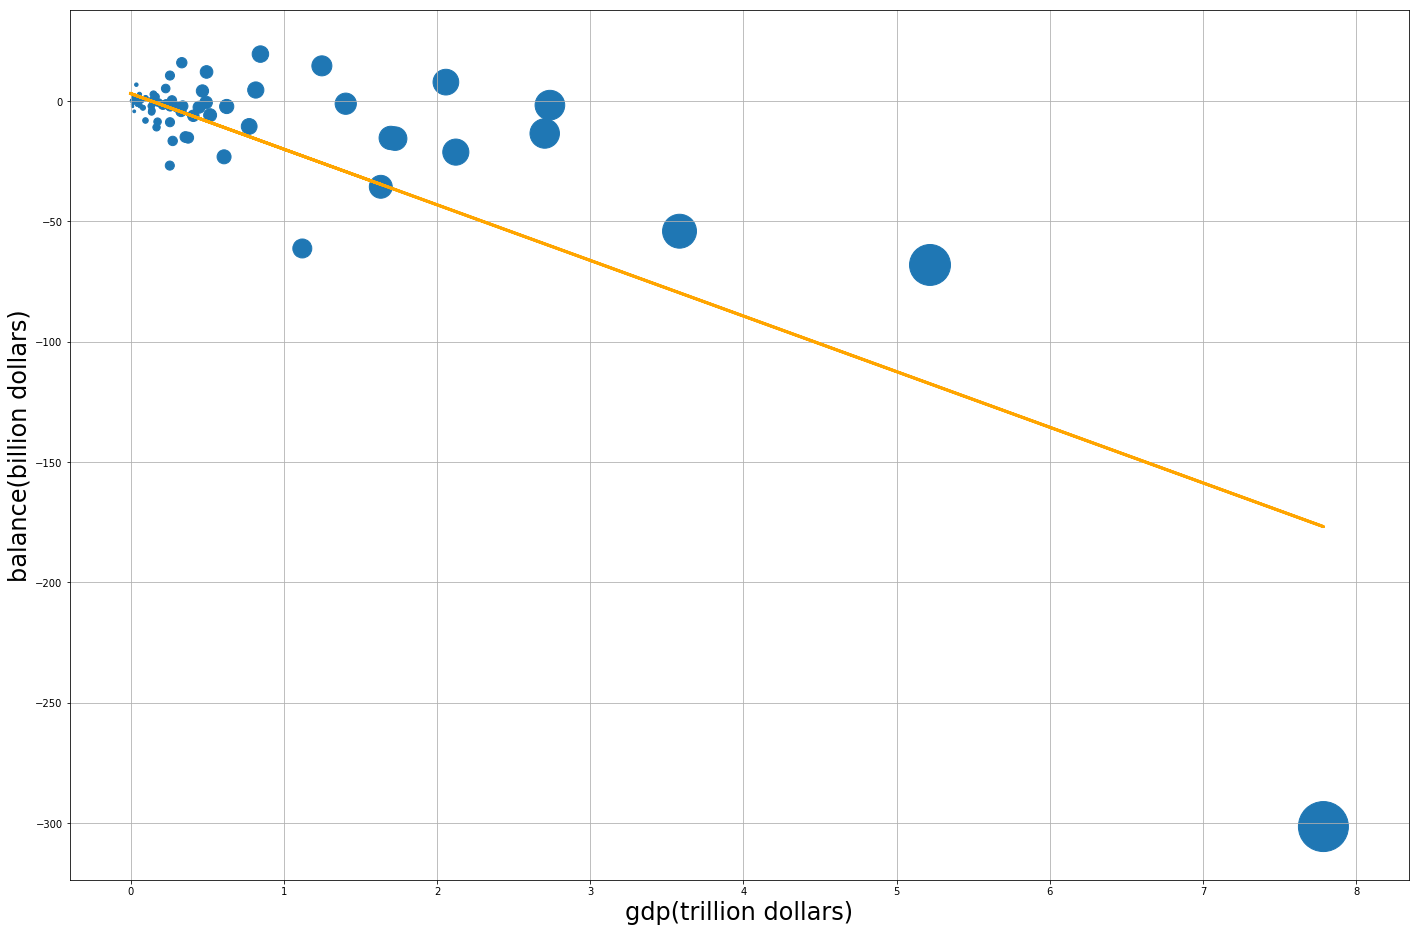

In [778]:

x_axis= np.array(merged_df['mean gdp'])/10**12

y_axis=np.array(merged_df['mean balance'])/10**9


max_x = max(x_axis)
max_y = max(y_axis)


(slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

print(f'R^2 value is {rvalue**2}')
print(f'p value is {pvalue}')

fig, ax = plt.subplots(1,1,figsize=(24,16))




ax.plot(x_axis,fit
        ,'orange'
        ,linewidth=3)

ax.scatter( x_axis
           ,y_axis
           ,s=2500*x_axis/max_x
          )


ax.set_xlabel("gdp(trillion dollars)",fontsize=24)
ax.set_ylabel("balance(billion dollars)",fontsize=24)
ax.grid()
plt.show()

In [779]:

trace = go.Scatter(
    x = x_axis,
    y = y_axis,
    mode = 'markers'
)
trace2 = go.Scatter(
                  x=x_axis,
                  y=fit,
                  mode='lines',
                  name='Fit'
                  )
data = [trace,trace2]



In [780]:
# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')